### THIS IS THE GOOD NOTEBOOK

In [1]:
%%capture output
%run ~/ligo-surf-18/ECCENTRIC_POWER_DISTRIBUTIONS/SPECTROGRAM_POWERDIST_FUNCTIONS.ipynb

In [2]:
import math

In [3]:
# Initial eccentricity 
e0 = 0.3

# Parameters for spectrogram: 
theta = 0 
fftlen = 1
nMax = 15

In [4]:
# Theoretical power dist
nArray, g_theoretical = gDist(nMax,e0)

## Fixed Total Mass

In [5]:
# First, fixed total mass 
Mtot = 5.0

# Component masses:
M1 = np.arange(0.5,3,0.5)
M2 = Mtot - M1

# Reduced mass: 
Mu = (M1*M2)/Mtot
# Symmetric mass ratio: 
Eta = Mu/Mtot
# Chirp mass: 
Mchirp = Eta**(3.0/5)*Mtot

print "Total mass"
print Mtot
print "Component masses"
print M1
print M2 
print "Reduced mass" 
print Mu
print "Symmetric mass ratio"
print Eta
print "Chirp mass"
print Mchirp

Total mass
5.0
Component masses
[ 0.5  1.   1.5  2.   2.5]
[ 4.5  4.   3.5  3.   2.5]
Reduced mass
[ 0.45  0.8   1.05  1.2   1.25]
Symmetric mass ratio
[ 0.09  0.16  0.21  0.24  0.25]
Chirp mass
[ 1.17900463  1.66510641  1.9602054   2.12371752  2.17637641]


In [6]:
# Fixed total mass experimental power distribution curves 

g_experimental = {}

for i,ratio in enumerate(Eta):

    g_exp, n = genPowerDistFromSpec(e0, M1[i], M2[i], theta, fftlen, nMax)

    key = ratio  
    g_experimental[key] = g_exp
        
    print "Finished job for e0={}, m1={}, m2={}, eta={}".format(e0,M1[i],M2[i],ratio)

Finished job for e0=0.3, m1=0.5, m2=4.5, eta=0.09
Finished job for e0=0.3, m1=1.0, m2=4.0, eta=0.16
Finished job for e0=0.3, m1=1.5, m2=3.5, eta=0.21
Finished job for e0=0.3, m1=2.0, m2=3.0, eta=0.24
Finished job for e0=0.3, m1=2.5, m2=2.5, eta=0.25


Text(0,0.5,u'Normalized Power')

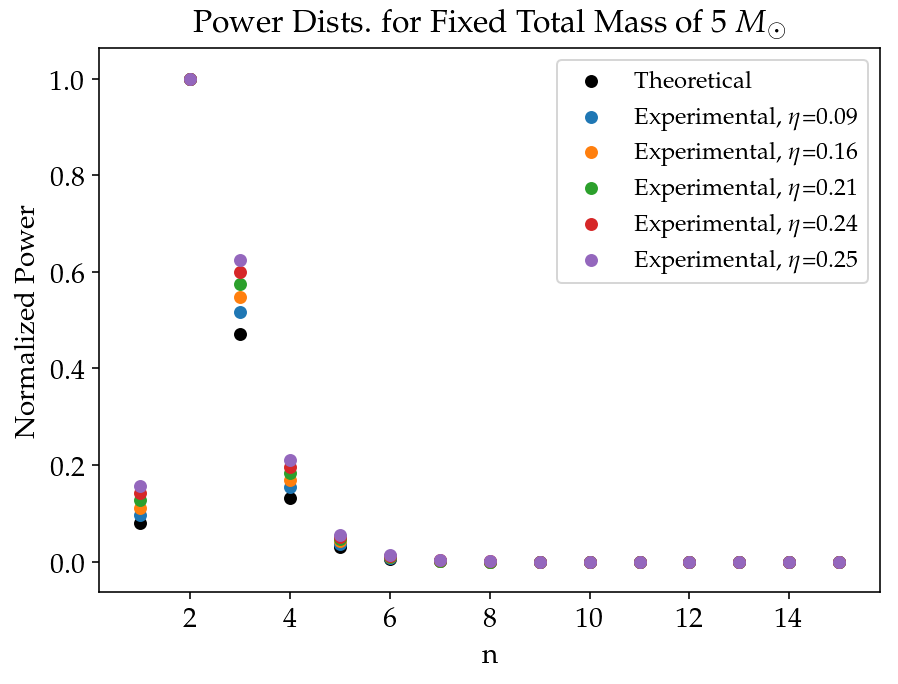

In [17]:
# Plotting 
plt.figure(figsize=(7,5))
plt.scatter(nArray,g_theoretical,c='black',s=30,label="Theoretical")
for ratio in Eta: 
    plt.scatter(nArray,g_experimental[ratio],label=r"Experimental, $\eta$={}".format(ratio),s=30)
plt.legend(fontsize=12)
plt.title(r"Power Dists. for Fixed Total Mass of 5 $M_\odot$",fontsize=16)
plt.xlabel("n",fontsize=14)
plt.ylabel("Normalized Power",fontsize=14)

## Fixed Chirp Mass

chirp mass = $\frac{(m_1\,m_2)^{3/5}}{(m_1 + m_2)^{1/5}}$ = $\mu^{3/5}\,M_{tot}^{2/5}$ = $\eta^{3/5}\,M_{tot}$

In [7]:
# Next, fixed chirp mass 
mchirp = 2.0

# Vary symmetric mass ratio 
# Max possible eta is 0.25
eta = np.arange(0.1,0.3,0.05)-1e-10

# Total mass 
mtot = mchirp/eta**(3.0/5)

# Component masses
m1 = 0.5*(mtot - np.sqrt(mtot**2 - 4*eta*mtot**2))
m2 = 0.5*(mtot + np.sqrt(mtot**2 - 4*eta*mtot**2))

print "Chirp mass"
print mchirp
print "Symmetric mass ratio"
print eta
print "Total mass"
print mtot
print "Component masses"
print m1
print m2

Chirp mass
2.0
Symmetric mass ratio
[ 0.1   0.15  0.2   0.25]
Total mass
[ 7.96214342  6.2427399   5.25305561  4.59479342]
Component masses
[ 0.89734682  1.14724226  1.45190886  2.29735076]
[ 7.06479659  5.09549764  3.80114675  2.29744266]


In [8]:
# Fixed chirp mass experimental power distribution curves 

g_experimental_2 = {}

for i,ratio in enumerate(eta):

    g_exp, n = genPowerDistFromSpec(e0, m1[i], m2[i], theta, fftlen, nMax)

    key = ratio  
    g_experimental_2[key] = g_exp
        
    print "Finished job for e0={}, m1={}, m2={}, eta={}".format(e0,m1[i],m2[i],ratio)

Finished job for e0=0.3, m1=0.897346821927, m2=7.06479659392, eta=0.0999999999
Finished job for e0=0.3, m1=1.14724225586, m2=5.09549764004, eta=0.1499999999
Finished job for e0=0.3, m1=1.45190886058, m2=3.80114674981, eta=0.1999999999
Finished job for e0=0.3, m1=2.29735076262, m2=2.29744265847, eta=0.2499999999


Text(0,0.5,u'Normalized Power')

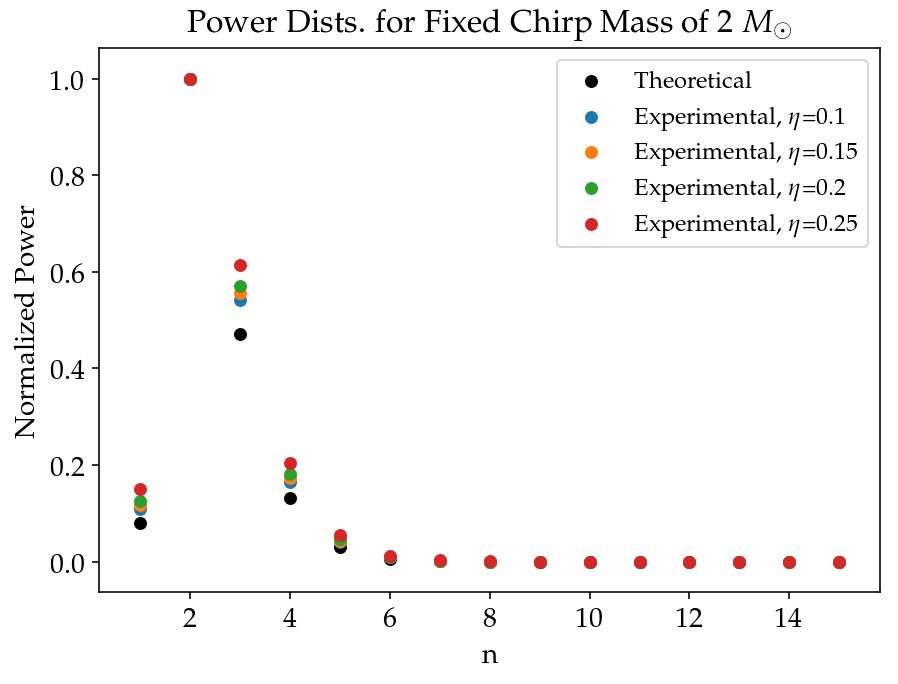

In [20]:
# Plotting 
plt.figure(figsize=(7,5))
plt.scatter(nArray,g_theoretical,c='black',s=30,label="Theoretical")
for ratio in eta: 
    plt.scatter(nArray,g_experimental_2[ratio],label=r"Experimental, $\eta$={}".format(np.round(ratio,2)),s=30)
plt.legend(fontsize=12)
plt.title(r"Power Dists. for Fixed Chirp Mass of 2 $M_\odot$",fontsize=16)
plt.xlabel("n",fontsize=14)
plt.ylabel("Normalized Power",fontsize=14)

## Fixed Symmetric Mass Ratio

In [34]:
eta = 0.2
mtot = np.arange(4,12,2)
m1 = 0.5*(mtot - np.sqrt(mtot**2 - 4*eta*mtot**2))
m2 = 0.5*(mtot + np.sqrt(mtot**2 - 4*eta*mtot**2))

In [35]:
# Fixed eta experimental power distribution curves 

g_experimental_3 = {}

for i,mt in enumerate(mtot):

    g_exp, n = genPowerDistFromSpec(e0, m1[i], m2[i], theta, fftlen, nMax)

    key = mt  
    g_experimental_3[key] = g_exp
        
    print "Finished job for e0={}, m1={}, m2={}, mtot={}".format(e0,m1[i],m2[i],mt)

Finished job for e0=0.3, m1=1.105572809, m2=2.894427191, mtot=4
Finished job for e0=0.3, m1=1.6583592135, m2=4.3416407865, mtot=6
Finished job for e0=0.3, m1=2.211145618, m2=5.788854382, mtot=8
Finished job for e0=0.3, m1=2.7639320225, m2=7.2360679775, mtot=10


Text(0,0.5,u'Normalized Power')

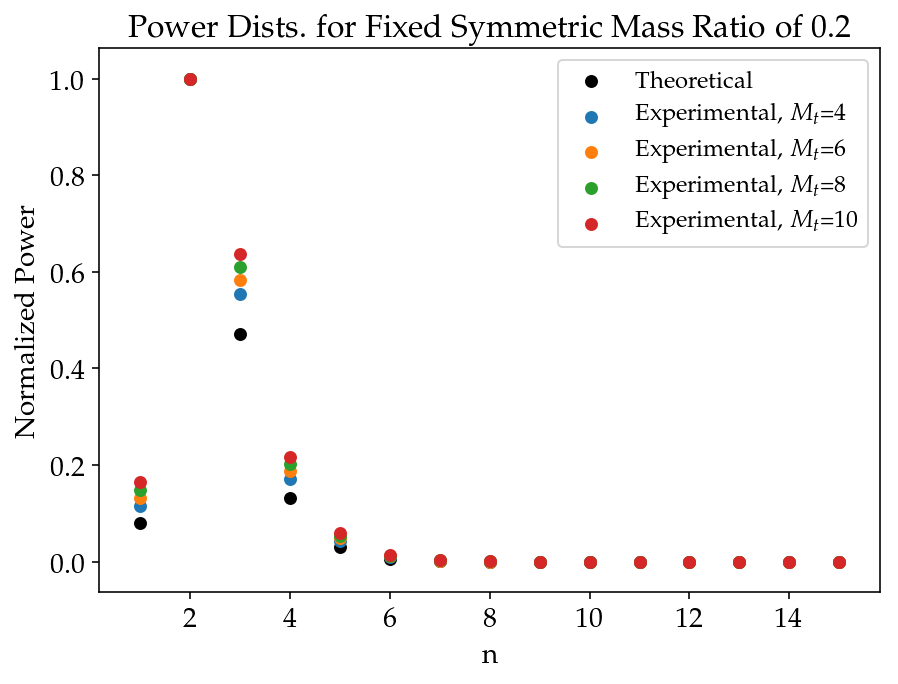

In [36]:
# Plotting 
plt.figure(figsize=(7,5))
plt.scatter(nArray,g_theoretical,c='black',s=30,label="Theoretical")
for mt in mtot: 
    plt.scatter(nArray,g_experimental_3[mt],label=r"Experimental, $M_t$={}".format(mt),s=30)
plt.legend(fontsize=12)
plt.title(r"Power Dists. for Fixed Symmetric Mass Ratio of 0.2",fontsize=16)
plt.xlabel("n",fontsize=14)
plt.ylabel("Normalized Power",fontsize=14)